# Energy Deposition in LArTPC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cosmicFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/EFrac/cosmicEFrac.csv'
signalFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/EFrac/nueArCCSignalEFrac.csv'
nueOutFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/EFrac/nueArCCoutFiducialEFrac.csv'

In [3]:
cosmic = pd.read_csv( cosmicFile )
signal = pd.read_csv( signalFile )
nueOut = pd.read_csv( nueOutFile )

In [4]:
cosmic

,Run,Event,FiducialE,OutE
0,0,165,0.000000,0.153584
1,0,331,0.159523,0.000000
2,0,384,0.000000,0.507793
3,0,509,0.000000,0.228477
4,0,749,0.000000,0.562273
...,...,...,...,...
3198,997,382,14.063988,0.440531
3199,997,933,1.991142,0.000000
3200,998,22,0.000000,3.962147
3201,998,934,0.000000,0.557835


In [5]:
signal

,Run,Event,FiducialE,OutE
0,0,0,0.184616,29.578156
1,0,1,5.629095,12.497522
2,0,2,6.619755,21.715674
3,0,3,16.736722,0.043994
4,0,4,42.585723,0.525935
...,...,...,...,...
99995,9,9995,33.547129,0.756629
99996,9,9996,22.810275,0.266997
99997,9,9997,12.237029,16.665957
99998,9,9998,37.439838,0.263158


In [6]:
cosmic['EFrac'] = cosmic.FiducialE/( cosmic.FiducialE + cosmic.OutE )
cosmic

,Run,Event,FiducialE,OutE,EFrac
0,0,165,0.000000,0.153584,0.000000
1,0,331,0.159523,0.000000,1.000000
2,0,384,0.000000,0.507793,0.000000
3,0,509,0.000000,0.228477,0.000000
4,0,749,0.000000,0.562273,0.000000
...,...,...,...,...,...
3198,997,382,14.063988,0.440531,0.969628
3199,997,933,1.991142,0.000000,1.000000
3200,998,22,0.000000,3.962147,0.000000
3201,998,934,0.000000,0.557835,0.000000


In [7]:
signal['EFrac'] = signal.FiducialE/( signal.FiducialE + signal.OutE )
nueOut['EFrac'] = nueOut.FiducialE/( nueOut.FiducialE + nueOut.OutE )

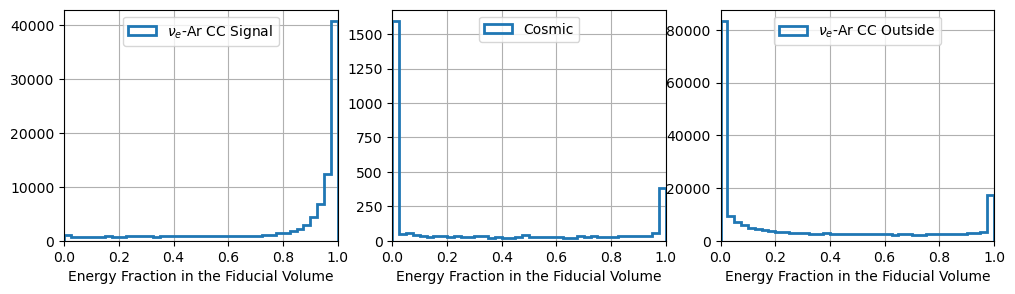

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3))

ax[0].hist( signal.EFrac, bins = np.linspace(0, 1, 41), histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC Signal')
ax[1].hist( cosmic.EFrac, bins = np.linspace(0, 1, 41), histtype = 'step', lw = 2, label = 'Cosmic')
ax[2].hist( nueOut.EFrac, bins = np.linspace(0, 1, 41), histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC Outside')

for iax in ax:
    iax.set_xlabel('Energy Fraction in the Fiducial Volume')
    iax.set_xlim([0, 1])
    iax.grid(':')
    iax.legend( loc = 'upper center')

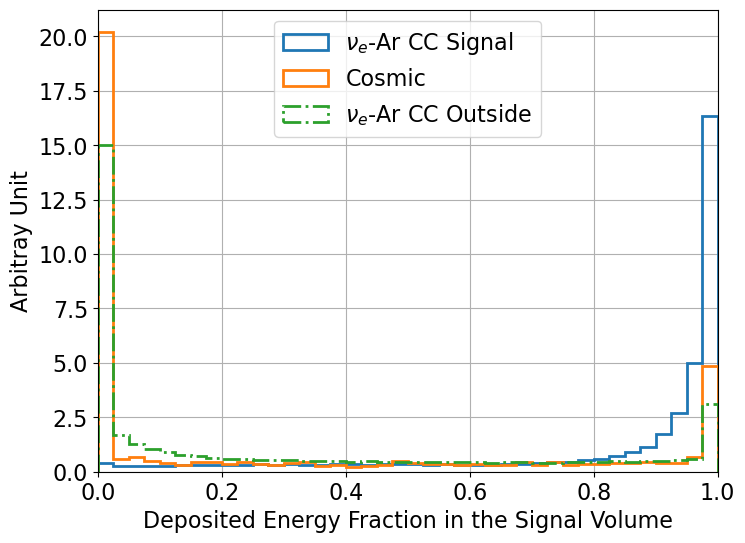

In [9]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.hist( signal.EFrac, bins = np.linspace(0, 1, 41), density = True, histtype = 'step', lw = 2, 
        label = r'$\nu_e$-Ar CC Signal' )
ax.hist( cosmic.EFrac, bins = np.linspace(0, 1, 41), density = True, histtype = 'step', lw = 2,
        label = 'Cosmic' )
ax.hist( nueOut.EFrac, bins = np.linspace(0, 1, 41), density = True, histtype = 'step', lw = 2, linestyle = '-.',
        label = r'$\nu_e$-Ar CC Outside' )

ax.set_xlabel( 'Deposited Energy Fraction in the Signal Volume', fontsize = 16)
ax.set_ylabel( 'Arbitray Unit', fontsize = 16)
ax.tick_params( axis = 'x', labelsize = 16)
ax.tick_params( axis = 'y', labelsize = 16)

ax.set_xlim([ 0, 1 ])
ax.grid(':')
ax.legend(fontsize = 16)

fig.savefig('EFraction.pdf')


In [19]:
cosmic[(cosmic.EFrac>0.4)&(cosmic.OutE>1)]

,Run,Event,FiducialE,OutE,EFrac
7,4,69,3.782942,1.016402,0.788221
74,24,832,26.420659,13.210901,0.666657
122,39,67,33.332567,18.290781,0.645688
126,40,125,3.870122,1.851283,0.676429
163,50,855,26.660479,32.496797,0.450671
...,...,...,...,...,...
3093,965,30,104.954581,28.553157,0.786131
3100,967,855,104.654955,12.363289,0.894347
3101,967,999,0.764749,1.054623,0.420337
3130,977,94,100.806261,45.749024,0.687838


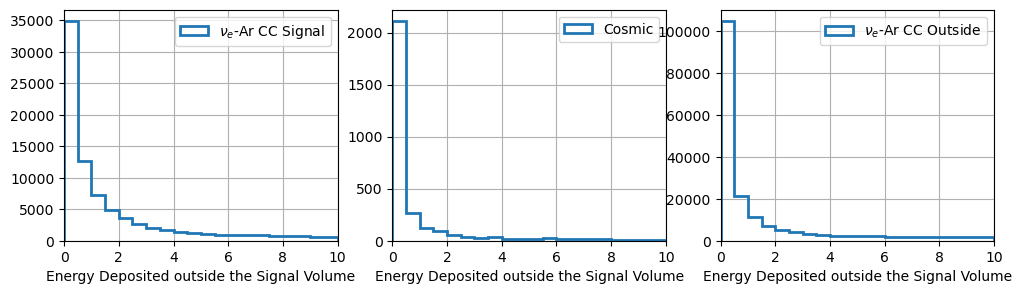

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3))

ax[0].hist( signal.OutE, bins = np.linspace(0, 10, 21), histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC Signal')
ax[1].hist( cosmic.OutE, bins = np.linspace(0, 10, 21), histtype = 'step', lw = 2, label = 'Cosmic')
ax[2].hist( nueOut.OutE, bins = np.linspace(0, 10, 21), histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC Outside')

for iax in ax:
    iax.set_xlabel('Energy Deposited outside the Signal Volume')
    iax.set_xlim([0, 10])
    iax.grid(':')
    iax.legend()

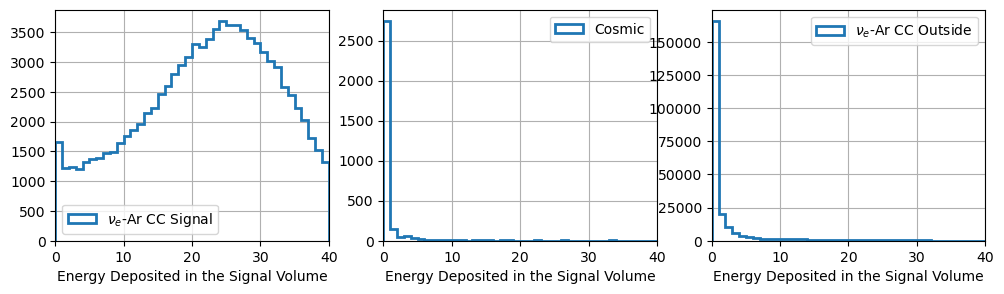

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3))

ax[0].hist( signal.FiducialE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC Signal')
ax[1].hist( cosmic.FiducialE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2, label = 'Cosmic')
ax[2].hist( nueOut.FiducialE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC Outside')

for iax in ax:
    iax.set_xlabel('Energy Deposited in the Signal Volume')
    iax.set_xlim([0, 40])
    iax.grid(':')
    iax.legend()

In [36]:
signal[(signal.EFrac>0.4)&(signal.FiducialE>5)]

,Run,Event,FiducialE,OutE,EFrac
3,0,3,16.736722,0.043994,0.997378
4,0,4,42.585723,0.525935,0.987801
5,0,5,37.406604,0.172946,0.995398
6,0,6,30.337107,0.227957,0.992542
7,0,7,25.727517,0.376710,0.985569
...,...,...,...,...,...
99995,9,9995,33.547129,0.756629,0.977943
99996,9,9996,22.810275,0.266997,0.988430
99997,9,9997,12.237029,16.665957,0.423383
99998,9,9998,37.439838,0.263158,0.993020


In [35]:
cosmic[(cosmic.EFrac>0.4)&(cosmic.FiducialE>5)]

,Run,Event,FiducialE,OutE,EFrac
13,6,919,20.009245,0.429830,0.978970
42,14,716,5.355698,0.000000,1.000000
74,24,832,26.420659,13.210901,0.666657
122,39,67,33.332567,18.290781,0.645688
129,40,521,8.522728,0.100848,0.988306
...,...,...,...,...,...
3121,974,770,9.714790,0.000000,1.000000
3130,977,94,100.806261,45.749024,0.687838
3159,985,746,89.942907,18.878457,0.826519
3179,991,629,5.702692,0.055942,0.990286
